In [1]:
import pandas as pd

- 学习目标
- 掌握描述性数据分析流程
- 能够使用pandas、seaborn进行数据分析和可视化- 

# 案例介绍

案例背景：

- 对 App 下载和评分数据分析，帮助 App 开发者获取和留存用户
- 通过对应用商店的数据分析为开发人员提供可操作的意见

- 字段  说明
- id  App ID：每个 App 唯一标识
- track_name  App 的名称
- size_bytes  以 bytes 为单位的 App 大小
- price  定价（美元）
- rating_count_tot  App 所有版本的用户评分数量
- rating_count_ver  App 当前版本的用户评分数量
- prime_genre  App 的类别
- user_rating  App 所有版本的用户评分
- sup_devices.num  支持的 iOS 设备数量
- ipadSc_urls.num  App 提供的截屏展示数量
- lang.num  支持的语言数量

# 数据清洗

## 加载applestore.csv数据，查看你数据基本信息

In [2]:
app = pd.read_csv('./data/applestore.csv',index_col=0)
app

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45
...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,Games,38,5,1
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,Games,38,0,1
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,Utilities,37,1,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,Games,38,0,2


In [3]:
# 查看数据集的字段信息
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   prime_genre       7197 non-null   object 
 7   sup_devices       7197 non-null   int64  
 8   ipadSc_urls       7197 non-null   int64  
 9   lang              7197 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 618.5+ KB


In [4]:
# 查看数据集的各字段统计值
app.describe()

,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


## 考虑将 sizebytes 变成 mb，新增数据 size_mb列

In [5]:
app['size_mb'] = app['size_bytes']/(1024*1024)
app

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562
...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,Games,38,5,1,120.777344
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,Games,38,0,1,115.166016
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,Utilities,37,1,1,106.165039
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,Games,38,0,2,92.731445


In [6]:
# 查看size_mb列的统计值
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

## 根据价格新增是否免费 paid 列

In [7]:
app['paid'] = app['price'].apply(lambda x: 1 if x > 0 else 0)
app

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,Games,38,5,1,120.777344,0
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,Games,38,0,1,115.166016,0
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,Utilities,37,1,1,106.165039,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,Games,38,0,2,92.731445,0


In [8]:
# 查看paid列的统计信息
app['paid'].value_counts()

0    4056
1    3141
Name: paid, dtype: int64

- 小结：

- 处理了给分析造成难度的值(size-bytes)
- 添加了方便分析的特征（免费/收费)

# 单变量分析

## 查看 App 的结果是如何分布的

In [9]:
app.price.value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
29.99        6
13.99        6
11.99        6
12.99        5
15.99        4
17.99        3
59.99        3
39.99        2
20.99        2
23.99        2
49.99        2
22.99        2
27.99        2
16.99        2
299.99       1
21.99        1
47.99        1
99.99        1
74.99        1
34.99        1
18.99        1
249.99       1
Name: price, dtype: int64

- 从数据中可以看出，价格>50的比较少，可以按照价格将 App 数据进行分组

## 按照价格将 App 数据进行分组今天 15:17俊辉

In [10]:
bins = [0,2,10,30]
labels = ['<2','<10','<30']
app['price_new'] = pd.cut(app.price,bins,right=False,labels=labels)
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2


In [11]:
# 分组后查看数据分布情况
app.groupby('price_new')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<30,84.0,18.573333,5.241650,11.99,14.99,16.49,21.24,29.99


## 查看不同类别 App 价格是如何分布的

In [12]:
# 不同类别App价格是如何分布的
app.groupby('prime_genre')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,57.0,5.116316,10.247031,0.0,0.0,2.99,4.99,59.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,453.0,4.028234,18.725946,0.0,0.0,2.99,2.99,299.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


## 删除价格大于 49.99 的 App 数据

In [13]:
app = app[app['price'] <= 49.99]
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2


## 利用 App 所有版本的评分数量对数据进行分组

In [14]:
# 查看App所有版本的评分数量的统计信息
app.rating_count_tot.describe()

count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [15]:
bins = [0,1000,5000,100000,5000000]
app['rating_new'] = pd.cut(app['rating_count_tot'],bins,right=False)
app.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_14276\2215553365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['rating_new'] = pd.cut(app['rating_count_tot'],bins,right=False)


,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new,rating_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10,"[5000, 100000)"
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2,"[100000, 5000000)"
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2,"[100000, 5000000)"
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2,"[100000, 5000000)"
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2,"[100000, 5000000)"


In [16]:
# 分组后查看数据分布情况
app.groupby('rating_new')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4587.0,1.798696,3.324682,0.0,0.0,0.0,2.99,49.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


# 业务数据可视化

## 查看 App 的类别和用户评分之间的关系，绘制折线图

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Games'),
  Text(1, 0, 'Productivity'),
  Text(2, 0, 'Weather'),
  Text(3, 0, 'Shopping'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Travel'),
  Text(9, 0, 'Social Networking'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Business'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Entertainment'),
  Text(14, 0, 'Photo & Video'),
  Text(15, 0, 'Navigation'),
  Text(16, 0, 'Education'),
  Text(17, 0, 'Lifestyle'),
  Text(18, 0, 'Food & Drink'),
  Text(19, 0, 'News'),
  Text(20, 0, 'Book'),
  Text(21, 0, 'Medical'),
  Text(22, 0, 'Catalogs')])

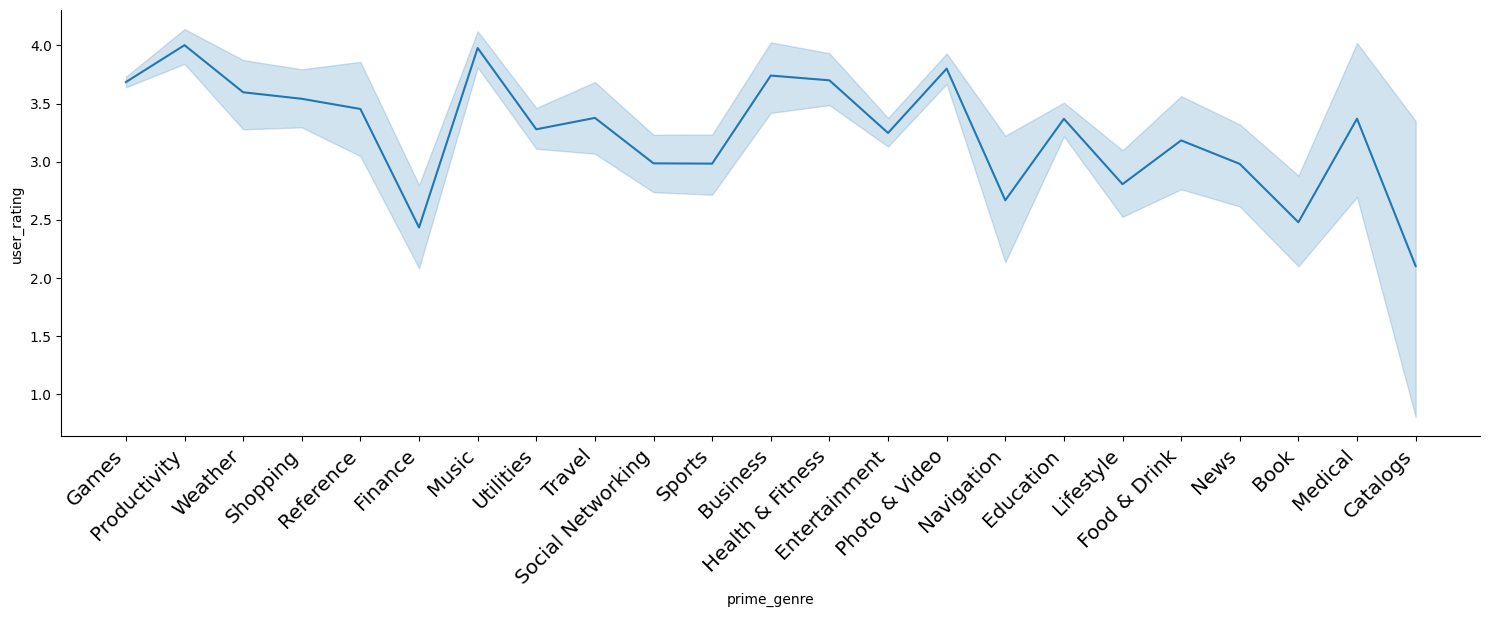

In [18]:
# app评分关系
# height:关键字来控制图片高度
# aspect:控制宽高比例
sns.relplot(x='prime_genre',y='user_rating',kind='line',data=app,height=5,aspect=3)
# 将x轴文字旋转45度
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

In [19]:
# 结果说明：从上图中可以看出，大部分评分集中在 2 分和 4 分之间

## 查看价格小于等于 9.99 元的 App 价格分布

C:\Users\hp\AppData\Local\Temp\ipykernel_14276\2678387412.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_result['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

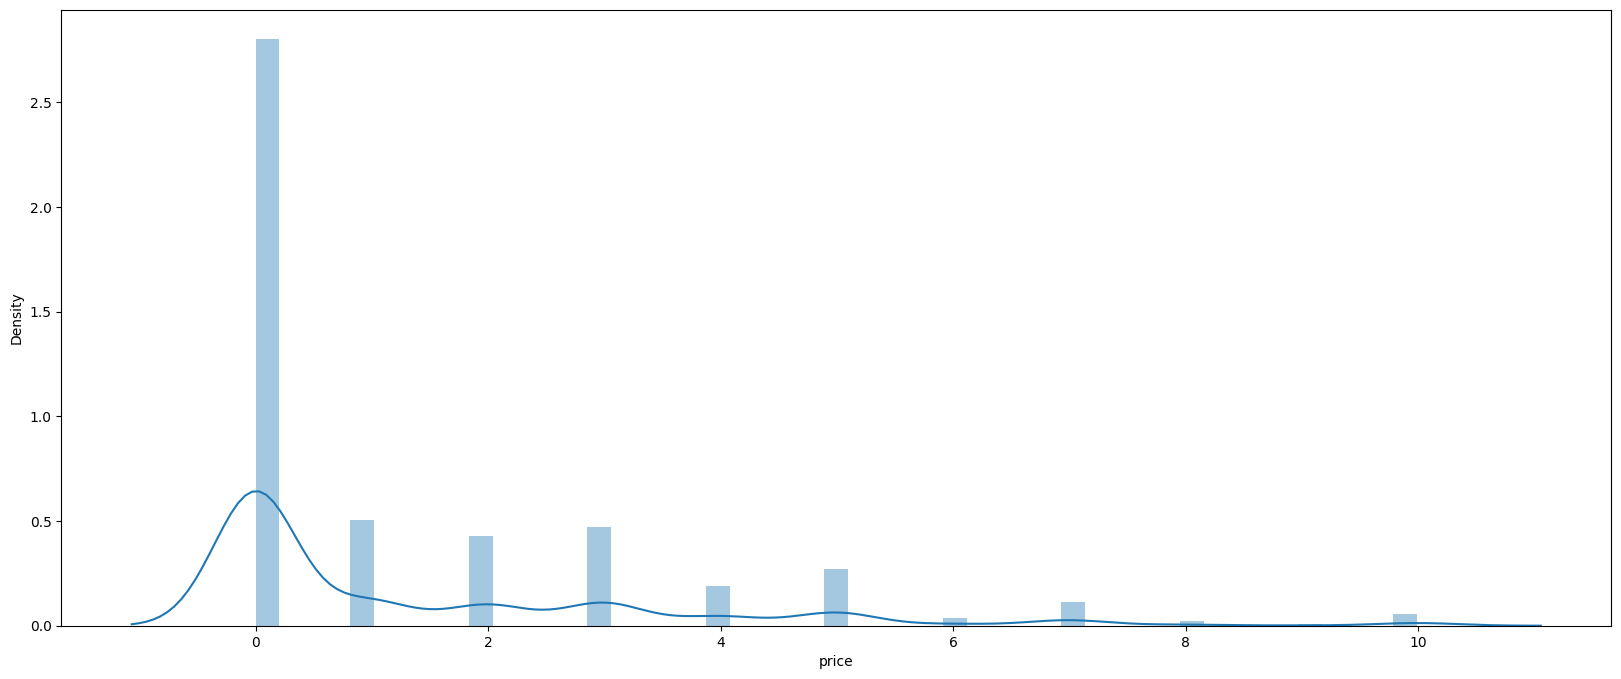

In [20]:
plt.figure(figsize=(20,8))
# 筛选出price<=9.99的App数据
app_result = app[app['price']<=9.99]
sns.distplot(app_result['price'])

In [21]:
# 结果说明：从上面的结果中看出，大部分应用都是免费的，极少数APP的收费>5元

## 查看不同类别的收费 App 的价格分布

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Games'),
  Text(0, 1, 'Utilities'),
  Text(0, 2, 'Reference'),
  Text(0, 3, 'Business'),
  Text(0, 4, 'Music'),
  Text(0, 5, 'Weather'),
  Text(0, 6, 'Health & Fitness'),
  Text(0, 7, 'Entertainment'),
  Text(0, 8, 'Photo & Video'),
  Text(0, 9, 'Navigation'),
  Text(0, 10, 'Education'),
  Text(0, 11, 'Lifestyle'),
  Text(0, 12, 'Finance'),
  Text(0, 13, 'Productivity'),
  Text(0, 14, 'Travel'),
  Text(0, 15, 'Food & Drink'),
  Text(0, 16, 'Sports'),
  Text(0, 17, 'Medical'),
  Text(0, 18, 'News'),
  Text(0, 19, 'Shopping'),
  Text(0, 20, 'Book'),
  Text(0, 21, 'Social Networking'),
  Text(0, 22, 'Catalogs')])

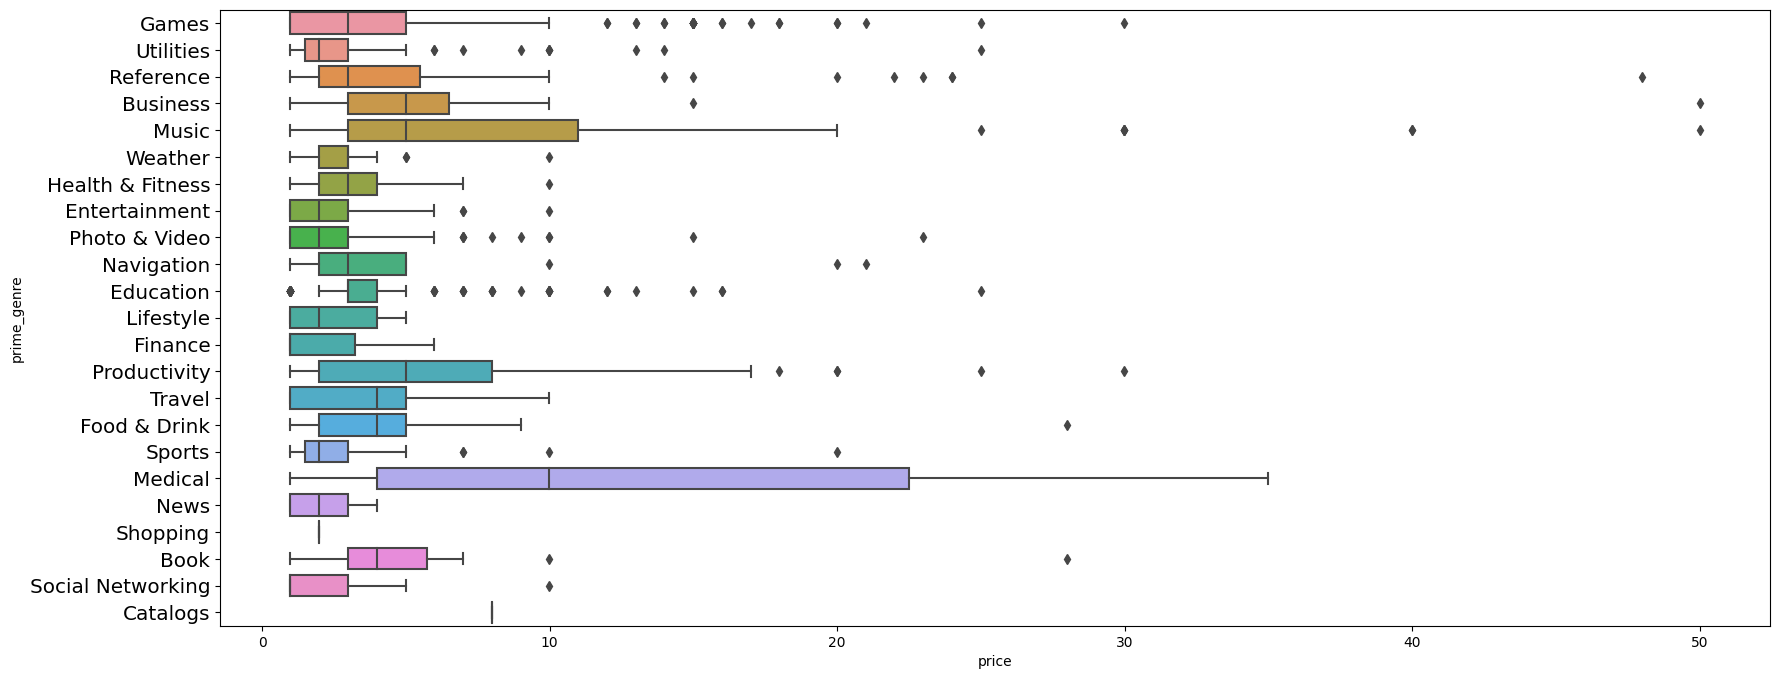

In [22]:
plt.figure(figsize=(20,8))
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])
plt.yticks(fontweight='light',fontsize='x-large')

In [23]:
# 结果说明：价格绝大部分都集中在 9.99 美元以内，个别类别（如医疗）等因专业性总体价格会高于其他类别

## 查看数量最多的前 5 个类别收费 App 的价格分布

<AxesSubplot: xlabel='price', ylabel='prime_genre'>

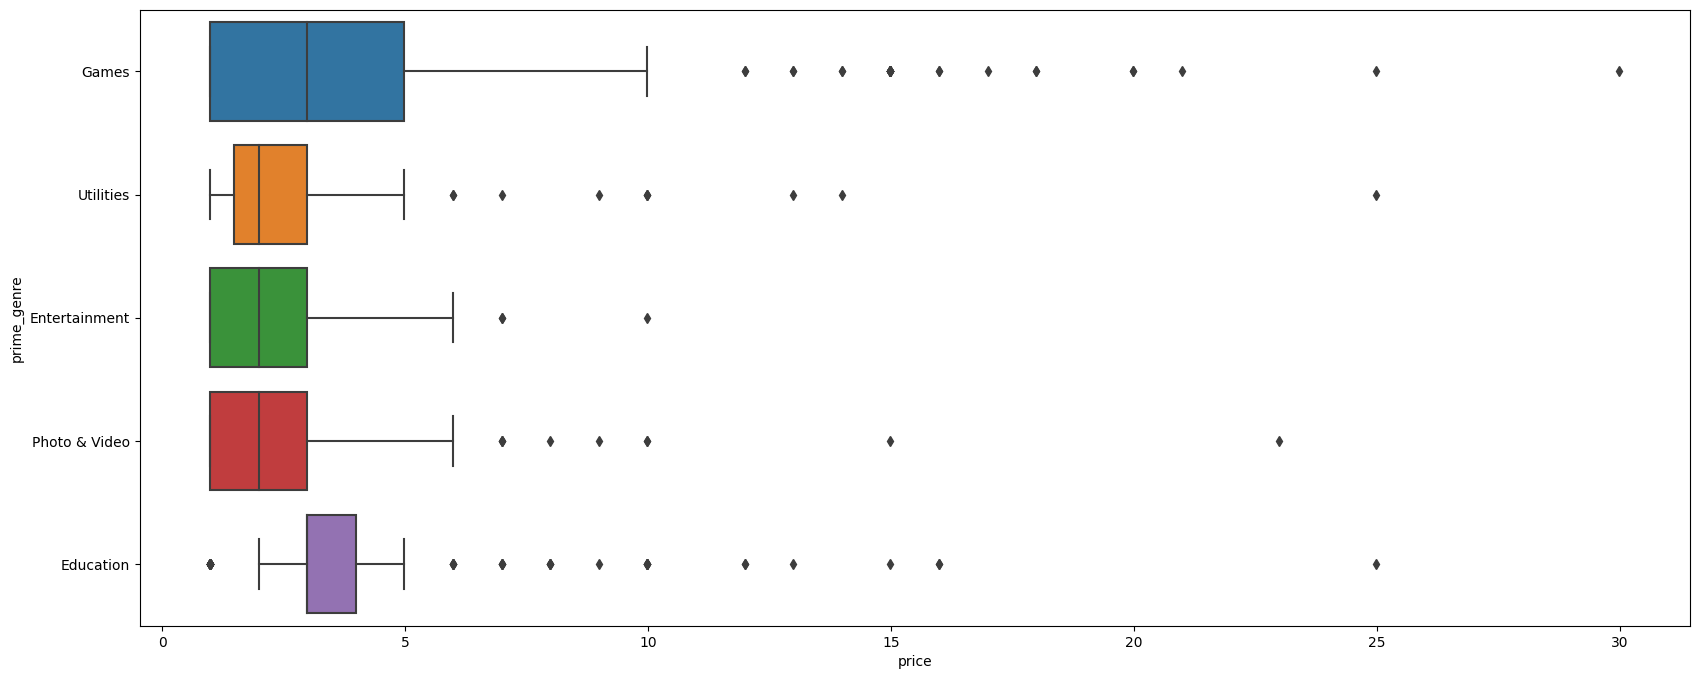

In [24]:
# 筛选出数量最多的前五类App的数据
top5 = app.groupby('prime_genre')['price'].count().sort_values(ascending=False).head()
app5 = app[app.prime_genre.isin(top5.index)]
# 绘制箱线图
plt.figure(figsize=(20,8))
sns.boxplot(x='price',y='prime_genre',data=app5[app5['paid']==1])

In [25]:
# 结果说明：从上图可以看出，Games的价格分布更广，最大值也较高，异常值也较多

- 箱子的中间有一条线，代表了数据的中位数
- 箱子的上下底，分别是数据的上四分位数（Q3）和下四分位数（Q1）
- 箱体包含了50%的数据。因此，箱子的高度在一定程度上反映了数据的波动程度
- 上下边缘则代表了该组数据的最大值和最小值
- 有时候箱子外部会有一些点，可以理解为数据中的"异常值"- 

## 查看 App 数据中价格和用户评分的关系，绘制散点图

<AxesSubplot: xlabel='price', ylabel='user_rating'>

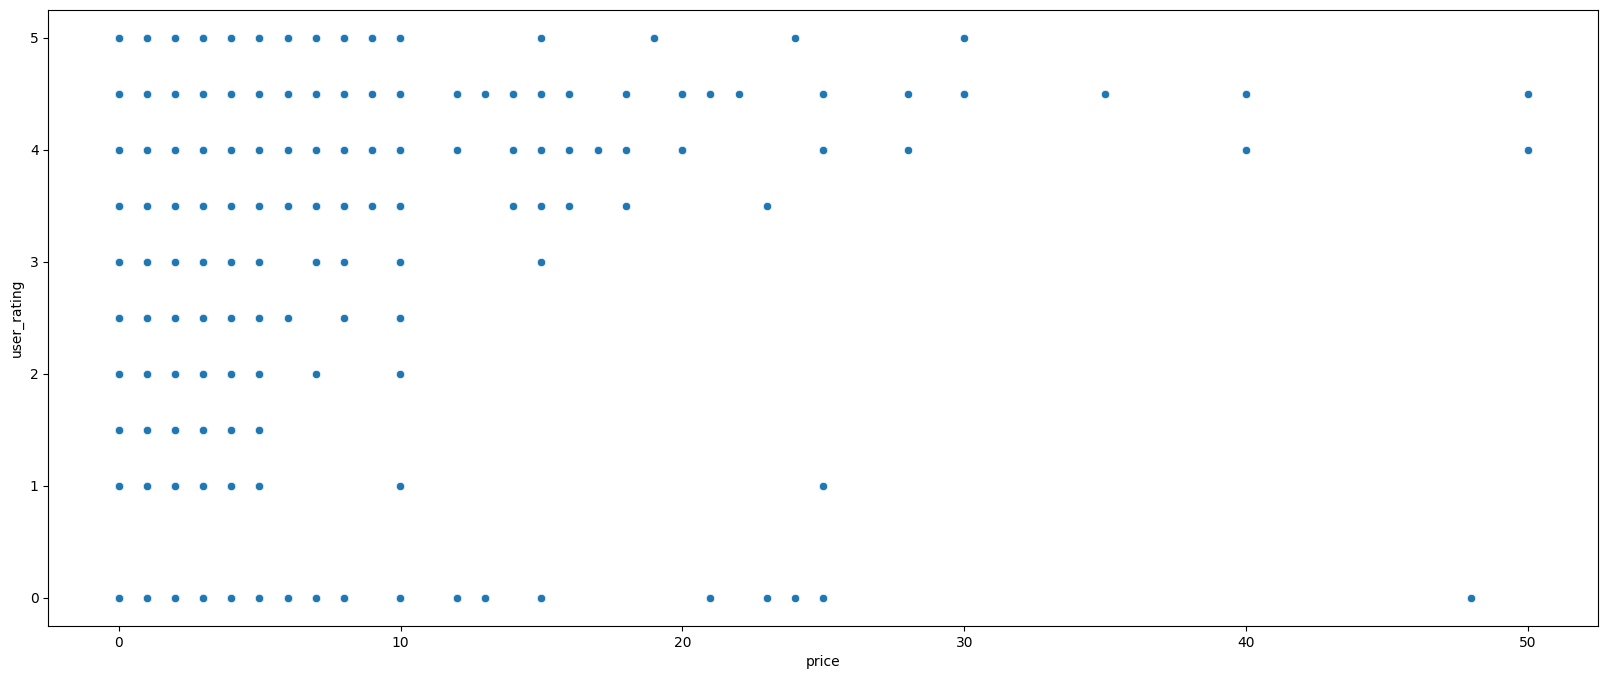

In [26]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='price',y='user_rating',data=app)

In [27]:
# 结果说明：从散点图可以看出，价格和评价关联不强，高价的应用评价两级分化，但数据相对较少

<AxesSubplot: xlabel='prime_genre', ylabel='user_rating'>

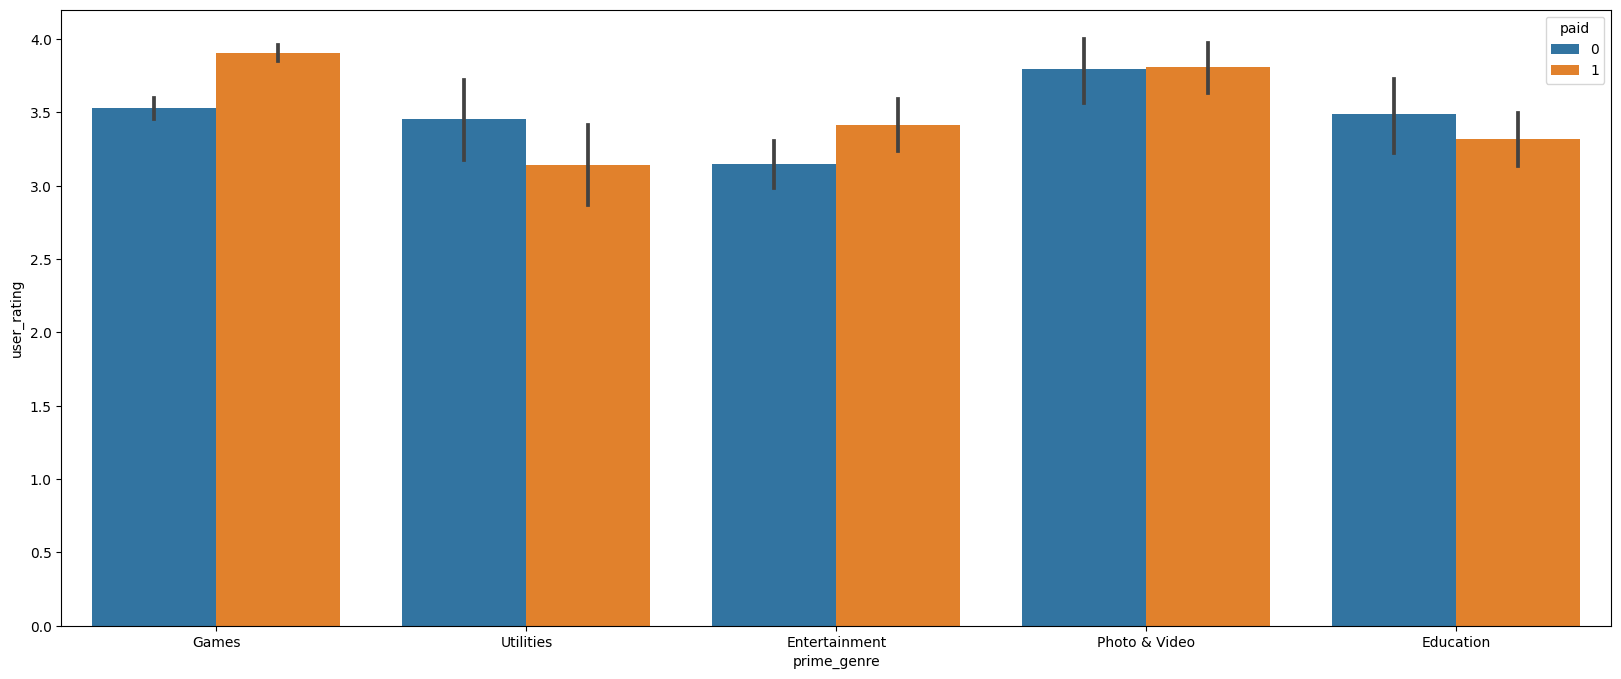

In [28]:
# 同一类别，将免费和付费的评分进行对比
plt.figure(figsize=(20,8))
sns.barplot(x='prime_genre',y='user_rating',data=app5,hue='paid')

# 业务解读

## 业务问题1：免费或收费 App 集中在哪些类别？

分析思路：

- 第一步：将数据统计出每个类别有多少个app
- 第二步：从高到低进行排列
- 第三步：将数据进行可视化- 

<AxesSubplot: xlabel='count', ylabel='prime_genre'>

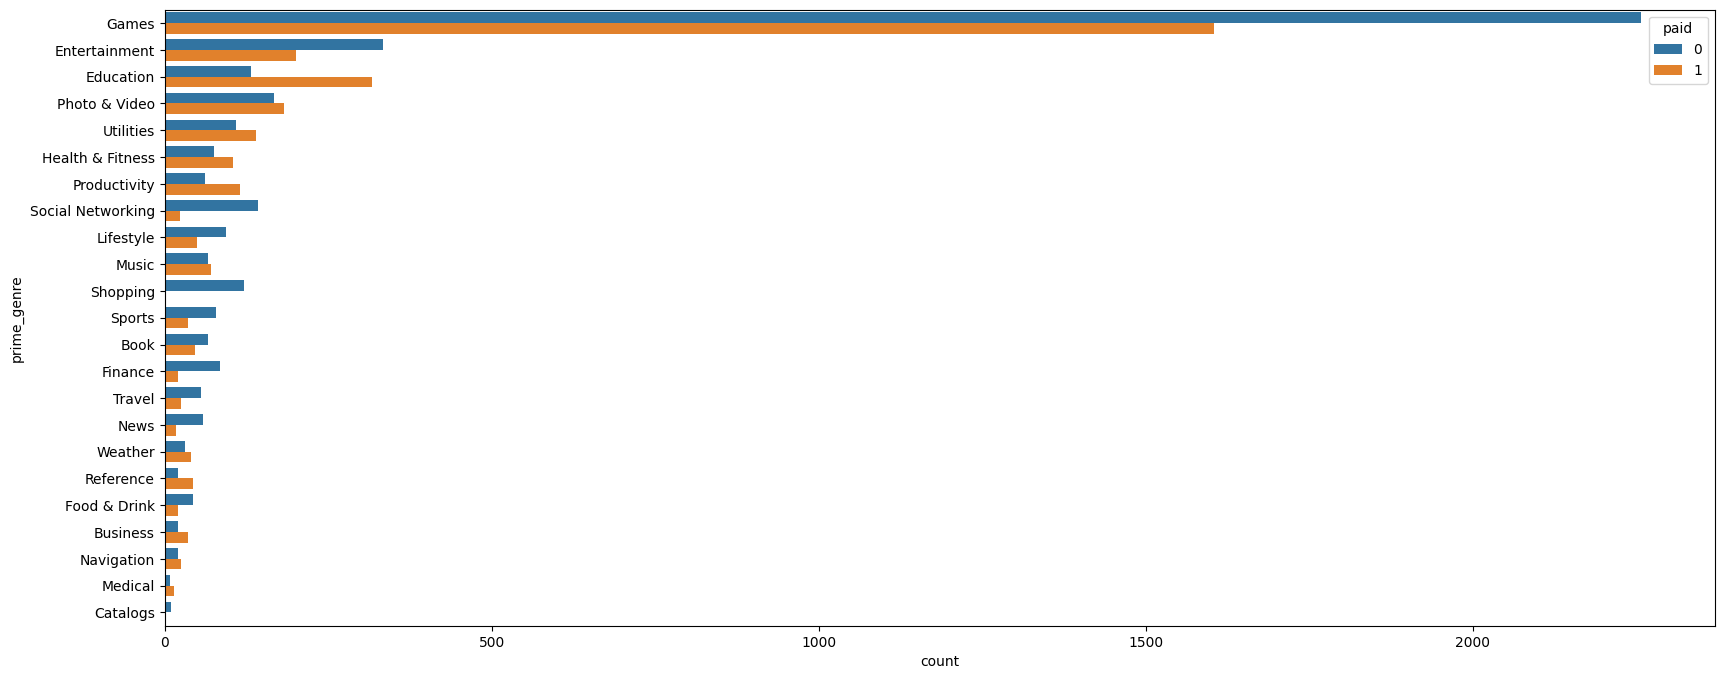

In [29]:
plt.figure(figsize=(20,8))
# 参数order指定数据显示的顺序
sns.countplot(y='prime_genre',data=app,order=app['prime_genre'].value_counts().index,hue='paid')

In [30]:
# 业务解答：免费或收费都是高度集中在游戏类别

## 业务问题2：免费与收费的 App 在不同评分区间的分布？

### 将评分进行分箱，查看落入不同箱中应用的数量

In [31]:
bins = [0,0.5,2.5,4.5,5.1]
app['rating_level'] = pd.cut(app.user_rating,bins,right=False)
app

C:\Users\hp\AppData\Local\Temp\ipykernel_14276\922444997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['rating_level'] = pd.cut(app.user_rating,bins,right=False)


,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new,rating_new,rating_level
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10,"[5000, 100000)","[2.5, 4.5)"
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2,"[100000, 5000000)","[2.5, 4.5)"
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2,"[100000, 5000000)","[2.5, 4.5)"
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2,"[100000, 5000000)","[2.5, 4.5)"
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2,"[100000, 5000000)","[4.5, 5.1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,Games,38,5,1,120.777344,0,<2,"[0, 1000)","[4.5, 5.1)"
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,Games,38,0,1,115.166016,0,<2,"[0, 1000)","[4.5, 5.1)"
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,Utilities,37,1,1,106.165039,1,<2,"[0, 1000)","[4.5, 5.1)"
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,Games,38,0,2,92.731445,0,<2,"[0, 1000)","[4.5, 5.1)"


In [32]:
app.groupby('rating_level')['user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 0.5)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.5, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2903.0,3.646056,0.467987,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.1)",3152.0,4.578046,0.181500,4.5,4.5,4.5,4.5,5.0


### 数据可视化

<AxesSubplot: xlabel='paid', ylabel='count'>

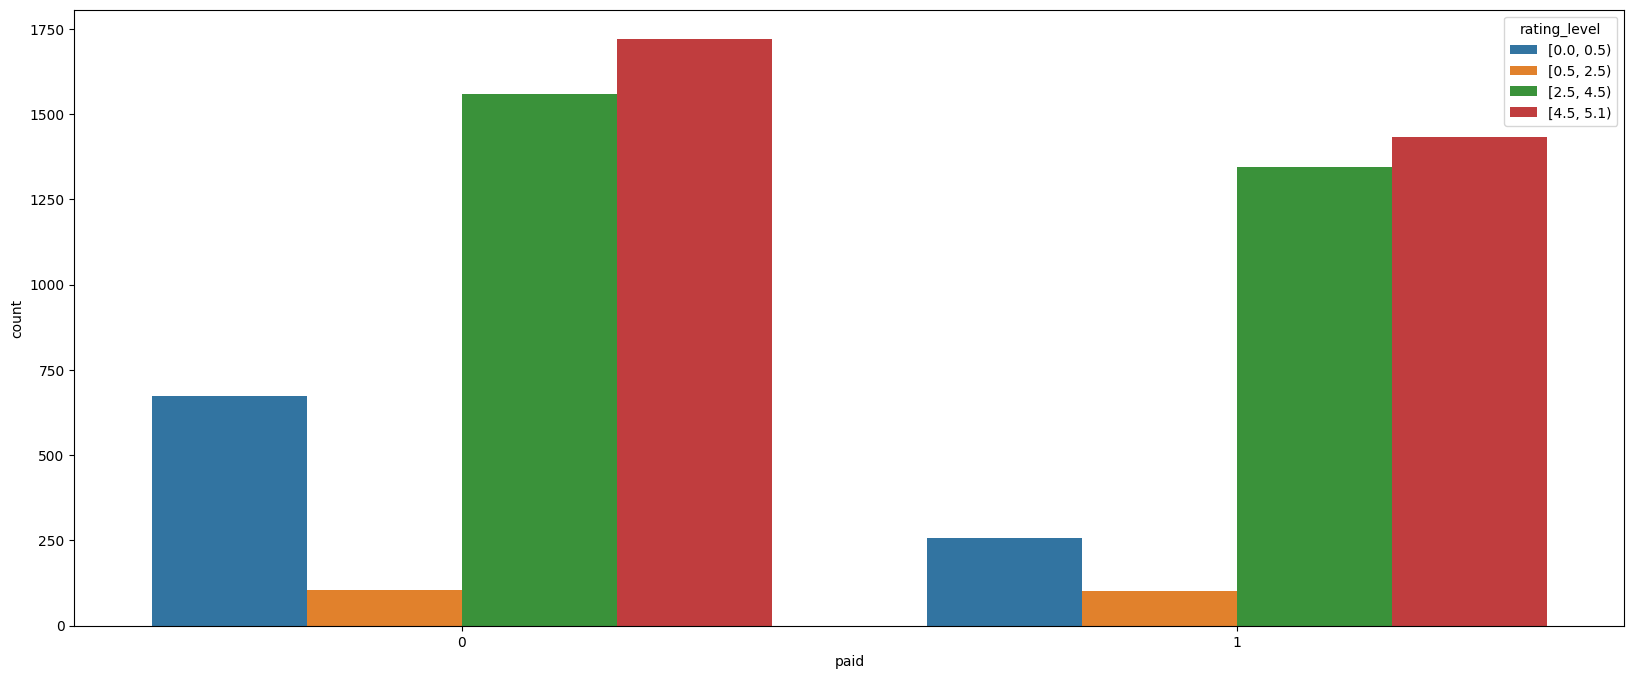

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(x='paid',data=app,hue='rating_level')

## 业务问题3：APP的价格、大小和用户评分之间有关系吗？

### 通过 corr 计算 App 的价格、大小和用户评分之间的关系

In [34]:
app[['user_rating','price','size_mb']].corr()

,user_rating,price,size_mb
user_rating,1.000000,0.073237,0.066160
price,0.073237,1.000000,0.314386
size_mb,0.066160,0.314386,1.000000


### 通过热力图来查看变量之间两两相关系数

<AxesSubplot: >

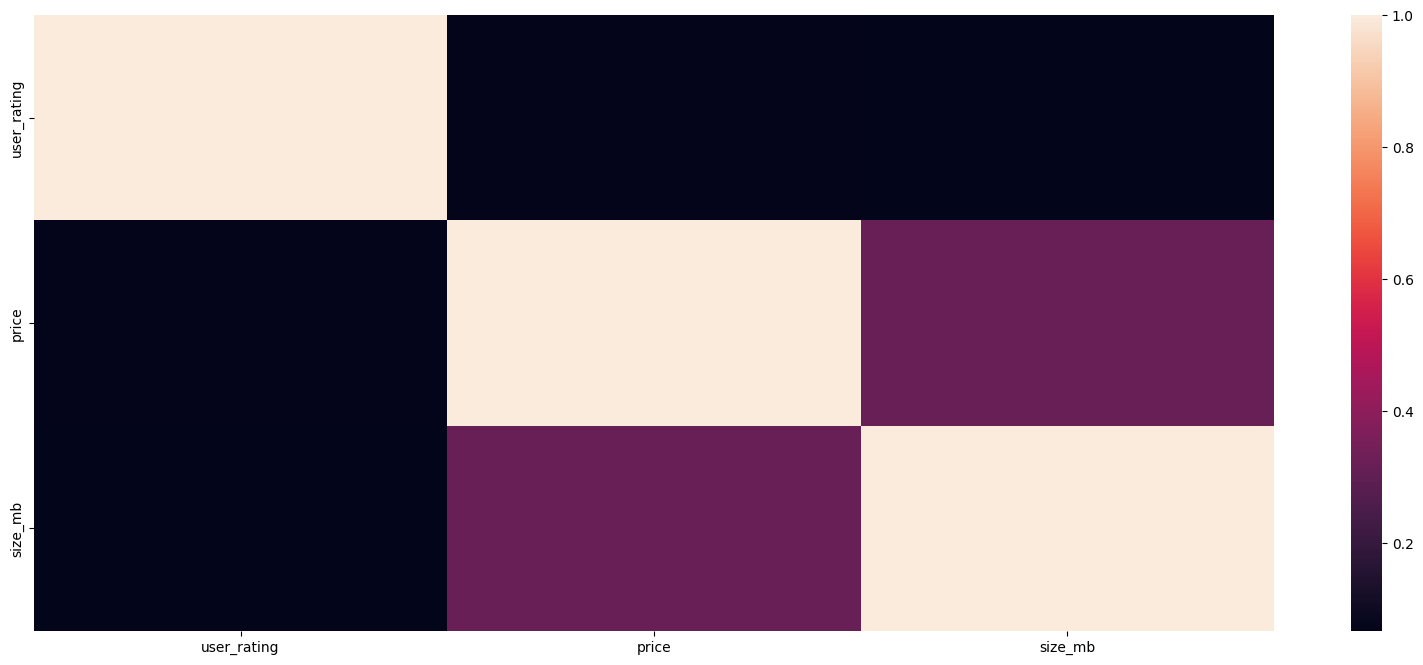

In [35]:
plt.figure(figsize=(20,8))
sns.heatmap(app[['user_rating','price','size_mb']].corr())

# 总结
- 常规的探索性数据分析套路：查看概况->单变量分析->多变量分析->可视化分析
- seaborn在绘制柱状图的时候，可以使用hue参数 传入类别型变量，方便进行对比